### Kelompok Kelas IK-2D
<b> 1. Afifah Naura Kamilia (3.34.21.3.02)</b><br>
<b> 2. Nabilla Syaharani Putri S (3.34.21.3.16)</b>

## UAS Praktikum Kecerdasan Buatan

# Prepare Datasets

install Kaggle untuk mengunduh dataset

In [1]:
!pip install kaggle

     ---------------------------------------- 77.9/77.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.15-py3-none-any.whl size=99605 sha256=cfddeebe1524119cb17b24adc8654b3c1a2015178b7c86f07967a34e86794eea
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2c\c2\6e\15b89ec0bbf983ac0ebbdf831640411513f19709817e40514f
Successfully built kaggle


In [11]:
!pip show kaggle

Name: kaggle
Version: 1.5.15
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\users\user\anaconda3\lib\site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [15]:
!dir "C:\Users\User\.kaggle"

 Volume in drive C is Windows 10
 Volume Serial Number is 6CBA-3587

 Directory of C:\Users\User\.kaggle

07/09/2023  06:03 PM    <DIR>          .
07/09/2023  06:16 PM    <DIR>          ..
07/09/2023  05:44 PM                68 kaggle.json
               1 File(s)             68 bytes
               2 Dir(s)  201,653,641,216 bytes free


In [19]:
import kaggle
kaggle.api.authenticate()

Download Dataset yang diinginkan

In [1]:
!kaggle datasets download rkiattisak/luxury-watches-price-dataset


  0%|          | 0.00/7.57k [00:00<?, ?B/s]
100%|##########| 7.57k/7.57k [00:00<?, ?B/s]


Unzip File Dataset yang telah diunduh

In [21]:
!pip install unzip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1279 sha256=caf68074004bafe271a9e41727373a4c64b82890a175420a0957d30c6144ea5d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\88\2c\2b\d12ab5bb9f34eba42f98231b969311f33d7dc1a2f484b902d1
Successfully built unzip


In [15]:
import zipfile

with zipfile.ZipFile("luxury-watches-price-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("datasets/")

## **Data Understanding**

* Dataset berisi daftar harga Luxury Watch beserta Spesifikasi dan Materialnya. Dataset dapat di download pada tautan berikut : https://www.kaggle.com/datasets/rkiattisak/luxury-watches-price-dataset
* Memberikan informasi seperti jumlah data, missing value, duplikasi data, korelasi antar kolom, dan sebaran data.
* Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

### **Load Dataset**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [77]:
# load the dataset
data = pd.read_csv("./Luxury watch.csv")
data

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.00,13.00,20.00,Black,Sapphire,Date,48 hours,9500.00
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.50,14.47,21.00,Blue,Sapphire,Date,60 hours,5800.00
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.00,13.00,20.00,White,Sapphire,Chronograph,42 hours,4200.00
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.00,14.25,22.00,Black,Sapphire,Chronograph,70 hours,7900.00
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.00,6.05,20.00,Silver,Sapphire,None,NaN,2800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.50,8.25,20.00,White,Sapphire,Date,38 hours,21500.00
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.00,15.50,23.00,Black,Sapphire,Date,120 hours,13500.00
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.50,9.70,20.00,Blue,Sapphire,Date,64 hours,1800.00
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.50,11.00,22.00,Blue,Sapphire,Date,40 hours,19000.00


**Informasi Tentang Kolom**
<ol>
    <li><b>Brand</b>: Merk Jam Tangan</li>
    <li><b>Model</b>: Model Jam Tangan</li>
    <li><b>Case Material</b>: Material (Bahan) yang digunakan pada Case Jam Tangan</li>
    <li><b>Strap Material</b>: Material atau bahan yang digunakan pada Pergelangan (Strap) Jam Tangan</li>
    <li><b>Movement Type</b>: Jenis Mekanisme Pada Jam Tangan</li>
    <li><b>Water Resistance</b>: kemampuan tahan jam tangan terhadap tekanan air pada kedalaman tertentu</li>
    <li><b>Case Diameter (mm)</b>: panjang Diameter Jam dalam mm (milimeter)</li>
    <li><b>Case Thickness (mm)</b>: Ketebalan case jam tangan dalam mm (milimeter)</li>
    <li><b>Band Width (mm)</b>: lebar tali jam dalam mm (milimeter)</li>
    <li><b>Dial Color</b>: Warna penanda pada jam</li>
    <li><b>Crystal Material</b>: bahan yang digunakan untuk menutupi dial</li>
    <li><b>Complications</b>: fitur atau fungsi tambahan</li>
    <li><b>Power Reserve</b>:  lama jam tangan dapat berfungsi</li>
    <li><b>Price (USD)</b>: Harga jam tangan dalam USD</li>
</ol>

### **Properti Data**

In [78]:
data.dtypes

Brand                   object
Model                   object
Case Material           object
Strap Material          object
Movement Type           object
Water Resistance        object
Case Diameter (mm)     float64
Case Thickness (mm)    float64
Band Width (mm)        float64
Dial Color              object
Crystal Material        object
Complications           object
Power Reserve           object
Price (USD)            float64
dtype: object

In [79]:
data.shape

(507, 14)

In [81]:
data.describe()

,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Price (USD)
count,507.00,507.00,507.00,506.00
mean,41.05,11.59,21.11,12082.96
std,2.54,2.49,1.66,10419.82
min,27.50,5.00,15.00,495.00
25%,40.00,9.80,20.00,5500.00
50%,41.00,12.00,20.00,8350.00
75%,42.00,13.30,22.00,16450.00
max,46.50,17.50,28.00,70000.00


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    float64
dtypes: float64(4), object(10)
memory usage: 55.6+ KB


**Harga (Price) dalam USD (Mata uang Amerika Serikat). Perlu di konversi dalam Rupiah. 1 USD = Rp. 15.130 (12/7/2023), sehingga perlu mengalikan Price (USD) dengan 15.130. selain itu, kita akan mengganti nama kolom Price (USD) dengan Price agar lebih mudah**

In [82]:
data.rename(columns = {'Price (USD)':'Price'}, inplace = True)
data.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.00,13.00,20.00,Black,Sapphire,Date,48 hours,9500.00
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.50,14.47,21.00,Blue,Sapphire,Date,60 hours,5800.00
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.00,13.00,20.00,White,Sapphire,Chronograph,42 hours,4200.00
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.00,14.25,22.00,Black,Sapphire,Chronograph,70 hours,7900.00
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.00,6.05,20.00,Silver,Sapphire,None,NaN,2800.00


Proses konversi Harga (price) dalam USD, menjadi rupiah.
1 usd = 15.130 rupiah

In [83]:
data['Price'] = data['Price'] * 15.130
data

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.00,13.00,20.00,Black,Sapphire,Date,48 hours,143735.00
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.50,14.47,21.00,Blue,Sapphire,Date,60 hours,87754.00
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.00,13.00,20.00,White,Sapphire,Chronograph,42 hours,63546.00
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.00,14.25,22.00,Black,Sapphire,Chronograph,70 hours,119527.00
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.00,6.05,20.00,Silver,Sapphire,None,NaN,42364.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.50,8.25,20.00,White,Sapphire,Date,38 hours,325295.00
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.00,15.50,23.00,Black,Sapphire,Date,120 hours,204255.00
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.50,9.70,20.00,Blue,Sapphire,Date,64 hours,27234.00
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.50,11.00,22.00,Blue,Sapphire,Date,40 hours,287470.00


**Cek missing value & data duplication**

In [84]:
data.isnull().sum()

Brand                   0
Model                   0
Case Material           0
Strap Material          0
Movement Type           0
Water Resistance        0
Case Diameter (mm)      0
Case Thickness (mm)     0
Band Width (mm)         0
Dial Color              0
Crystal Material        0
Complications           0
Power Reserve          14
Price                   1
dtype: int64

In [85]:
data.duplicated().sum()

19

In [86]:
#menghapus data duplikat
data = data.drop_duplicates()

In [87]:
data.duplicated().sum()

0

In [88]:
#menghapus data yang berisi nilai NaN
data.dropna(inplace=True)
data

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.00,13.00,20.00,Black,Sapphire,Date,48 hours,143735.00
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.50,14.47,21.00,Blue,Sapphire,Date,60 hours,87754.00
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.00,13.00,20.00,White,Sapphire,Chronograph,42 hours,63546.00
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.00,14.25,22.00,Black,Sapphire,Chronograph,70 hours,119527.00
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30 meters,42.90,9.20,20.00,Black,Sapphire,None,45 hours,83215.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.50,8.25,20.00,White,Sapphire,Date,38 hours,325295.00
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.00,15.50,23.00,Black,Sapphire,Date,120 hours,204255.00
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.50,9.70,20.00,Blue,Sapphire,Date,64 hours,27234.00
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.50,11.00,22.00,Blue,Sapphire,Date,40 hours,287470.00


**Dataset yang dipakai sudah bersih dari nilai Null dan terbebas dari duplikasi data**

**Mengganti Tipe Data Menjadi Integer**

In [89]:
data['Water Resistance']=data['Water Resistance'].str.extract(r'(\w+)')

In [90]:
data['Water Resistance']=data['Water Resistance'].astype(int)

In [91]:
data['Power Reserve']=data['Power Reserve'].str.extract(r'(\w+)')

In [92]:
data['Power Reserve']=data['Power Reserve'].astype(int)

**Melihat Korelasi Antar Kolom**

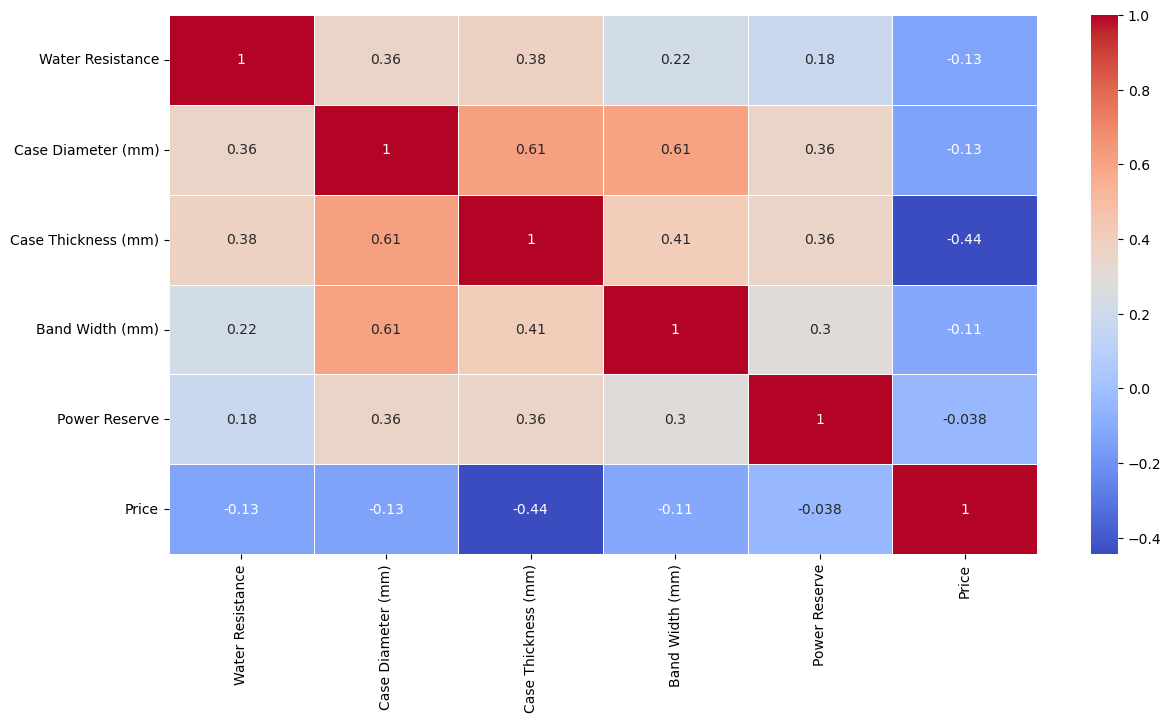

In [156]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

**melihat korelasi kolom Price dengan kolom lainnya**

In [94]:
data.corr()['Price']

Water Resistance      -0.13
Case Diameter (mm)    -0.13
Case Thickness (mm)   -0.44
Band Width (mm)       -0.11
Power Reserve         -0.04
Price                  1.00
Name: Price, dtype: float64

**Hapus data yg tidak berkorelasi**

In [95]:
data.drop(columns=['Movement Type', 'Complications', 'Case Material', 'Strap Material'], inplace=True)
data.head()

,Brand,Model,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Power Reserve,Price
0,Rolex,Submariner,300,40.00,13.00,20.00,Black,Sapphire,48,143735.00
1,Omega,Seamaster,600,43.50,14.47,21.00,Blue,Sapphire,60,87754.00
2,Tag Heuer,Carrera,100,41.00,13.00,20.00,White,Sapphire,42,63546.00
3,Breitling,Navitimer,30,43.00,14.25,22.00,Black,Sapphire,70,119527.00
5,Jaeger-LeCoultre,Reverso,30,42.90,9.20,20.00,Black,Sapphire,45,83215.00


In [96]:
data.corr()['Price']

Water Resistance      -0.13
Case Diameter (mm)    -0.13
Case Thickness (mm)   -0.44
Band Width (mm)       -0.11
Power Reserve         -0.04
Price                  1.00
Name: Price, dtype: float64

In [97]:
data

,Brand,Model,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Power Reserve,Price
0,Rolex,Submariner,300,40.00,13.00,20.00,Black,Sapphire,48,143735.00
1,Omega,Seamaster,600,43.50,14.47,21.00,Blue,Sapphire,60,87754.00
2,Tag Heuer,Carrera,100,41.00,13.00,20.00,White,Sapphire,42,63546.00
3,Breitling,Navitimer,30,43.00,14.25,22.00,Black,Sapphire,70,119527.00
5,Jaeger-LeCoultre,Reverso,30,42.90,9.20,20.00,Black,Sapphire,45,83215.00
...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,30,38.50,8.25,20.00,White,Sapphire,38,325295.00
503,Blancpain,Fifty Fathoms,300,45.00,15.50,23.00,Black,Sapphire,120,204255.00
504,Longines,Master Collection,30,38.50,9.70,20.00,Blue,Sapphire,64,27234.00
505,Vacheron Constantin,Overseas,150,41.50,11.00,22.00,Blue,Sapphire,40,287470.00


**Cek data kategorik yang ada pada Brand**

In [99]:
print(data['Brand'].unique())

['Rolex' 'Omega' 'Tag Heuer' 'Breitling' 'Jaeger-LeCoultre' 'Seiko'
 'Citizen' 'Tissot' 'Hamilton' 'Longines' 'Oris' 'Bell & Ross' 'Sinn'
 'Breguet' 'Audemars Piguet' 'Vacheron Constantin' 'Panerai' 'Tudor' 'IWC'
 'Montblanc' 'Blancpain' 'Zenith' 'Piaget' 'Ulysse Nardin' 'Jaquet Droz'
 'Bulgari' 'Chopard' 'Girard-Perregaux' 'Glashütte Original' 'Hublot'
 'Patek Philippe' 'Cartier' 'A. Lange & Sohne' 'Frederique Constant'
 'TAG Heuer' 'Baume & Mercier' 'A. Lange & Söhne']


**Dikarenakan data kategorik pada brand terlalu banyak, maka dilakukan penyederhanaan tipe Brand**

In [100]:
#Simple Brand Category
def setbrandcategory(text):
    if text == 'Rolex':
        return 'Rolex'
    elif text == 'Omega':
        return 'Omega'
    elif text == 'Tag Heuer':
        return 'Tag Heuer'
    elif text == 'Breitling':
        return 'Breitling'
    elif text == 'Jaeger-LeCoultre':
        return 'Jaeger-LeCoultre'
    elif text == 'Seiko':
        return 'Seiko'
    elif text == 'Citizen':
        return 'Citizen'
    else:
        return 'Other'
    
data['Brand'] = data['Brand'].apply(lambda x:setbrandcategory(x))
data

,Brand,Model,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Power Reserve,Price
0,Rolex,Submariner,300,40.00,13.00,20.00,Black,Sapphire,48,143735.00
1,Omega,Seamaster,600,43.50,14.47,21.00,Blue,Sapphire,60,87754.00
2,Tag Heuer,Carrera,100,41.00,13.00,20.00,White,Sapphire,42,63546.00
3,Breitling,Navitimer,30,43.00,14.25,22.00,Black,Sapphire,70,119527.00
5,Jaeger-LeCoultre,Reverso,30,42.90,9.20,20.00,Black,Sapphire,45,83215.00
...,...,...,...,...,...,...,...,...,...,...
502,Other,Classique,30,38.50,8.25,20.00,White,Sapphire,38,325295.00
503,Other,Fifty Fathoms,300,45.00,15.50,23.00,Black,Sapphire,120,204255.00
504,Other,Master Collection,30,38.50,9.70,20.00,Blue,Sapphire,64,27234.00
505,Other,Overseas,150,41.50,11.00,22.00,Blue,Sapphire,40,287470.00


In [101]:
print(data['Brand'].unique())

['Rolex' 'Omega' 'Tag Heuer' 'Breitling' 'Jaeger-LeCoultre' 'Seiko'
 'Citizen' 'Other']


**Cek Data Kategorik yang terdapat pada kolom Model**

In [102]:
print(data['Model'].unique())

['Submariner' 'Seamaster' 'Carrera' 'Navitimer' 'Reverso' 'Prospex'
 'Promaster' 'Le Locle' 'Khaki Field' 'Master Collection'
 'Big Crown ProPilot' 'Aviation' '104' 'Classique' 'Royal Oak' 'Overseas'
 'Speedmaster' 'Superocean' 'Luminor Base Logo' 'Black Bay'
 'GMT-Master II' "Pilot's Watch" 'Master Ultra Thin' '1858 Geosphere'
 'Datejust' 'Speedmaster Moonwatch' 'Portugieser' 'Fifty Fathoms'
 'El Primero' 'Polo S' 'Marine' 'Grande Seconde' 'Type XXI'
 'Octo Finissimo' 'Mille Miglia' 'Laureato' 'Senator' 'Classic Fusion'
 'Nautilus' 'Chronomaster' '1858' 'Luminor Marina' 'Luminor' 'Type XX'
 'HydroConquest' 'Khaki Field Auto' 'Superocean Heritage' 'Master Control'
 'Santos' 'Elite' 'Luminor Base' 'U1' 'Saxonia' 'Big Bang' 'Altiplano'
 'Luminor Due' 'Patrimony' 'Conquest' 'Ballon Bleu' 'Calatrava' 'Defy'
 'Jazzmaster' 'Heritage' 'Classics' 'Marine Torpilleur' 'U50' 'BR V2-92'
 'Superocean Heritage II' 'Santos de Cartier' "Pilot's Watch Mark XVIII"
 'Black Bay GMT' 'Divers Sixty-Five' 'M

**Dikarenakan data kategorik pada brand terlalu banyak, maka dilakukan penyederhanaan tipe Model**

In [103]:
#Simple Model Category
def setbrandcategory(text):
    if text == 'Submariner':
        return 'Submariner'
    elif text == 'Seamaster':
        return 'Seamaster'
    elif text == 'Carrera':
        return 'Carrera'
    elif text == 'Navitimer':
        return 'Navitimer'
    elif text == 'Reverso':
        return 'Reverso'
    elif text == 'Prospex':
        return 'Prospex'
    else:
        return 'Other'
    
data['Model'] = data['Model'].apply(lambda x:setbrandcategory(x))
data

,Brand,Model,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Power Reserve,Price
0,Rolex,Submariner,300,40.00,13.00,20.00,Black,Sapphire,48,143735.00
1,Omega,Seamaster,600,43.50,14.47,21.00,Blue,Sapphire,60,87754.00
2,Tag Heuer,Carrera,100,41.00,13.00,20.00,White,Sapphire,42,63546.00
3,Breitling,Navitimer,30,43.00,14.25,22.00,Black,Sapphire,70,119527.00
5,Jaeger-LeCoultre,Reverso,30,42.90,9.20,20.00,Black,Sapphire,45,83215.00
...,...,...,...,...,...,...,...,...,...,...
502,Other,Other,30,38.50,8.25,20.00,White,Sapphire,38,325295.00
503,Other,Other,300,45.00,15.50,23.00,Black,Sapphire,120,204255.00
504,Other,Other,30,38.50,9.70,20.00,Blue,Sapphire,64,27234.00
505,Other,Other,150,41.50,11.00,22.00,Blue,Sapphire,40,287470.00


In [104]:
print(data['Model'].unique())

['Submariner' 'Seamaster' 'Carrera' 'Navitimer' 'Reverso' 'Prospex'
 'Other']


**Cek Data Kategorik yang terdapat pada kolom Crystal Material**

In [105]:
print(data['Crystal Material'].unique())

['Sapphire' 'Mineral' 'Hesalite' 'Hardlex']


In [157]:
data.dtypes

Brand                   object
Model                   object
Water Resistance         int32
Case Diameter (mm)     float64
Case Thickness (mm)    float64
Band Width (mm)        float64
Dial Color              object
Crystal Material        object
Power Reserve            int32
Price                  float64
dtype: object

**Melihat Sebaran Data dari Masing-Masing Kolom**

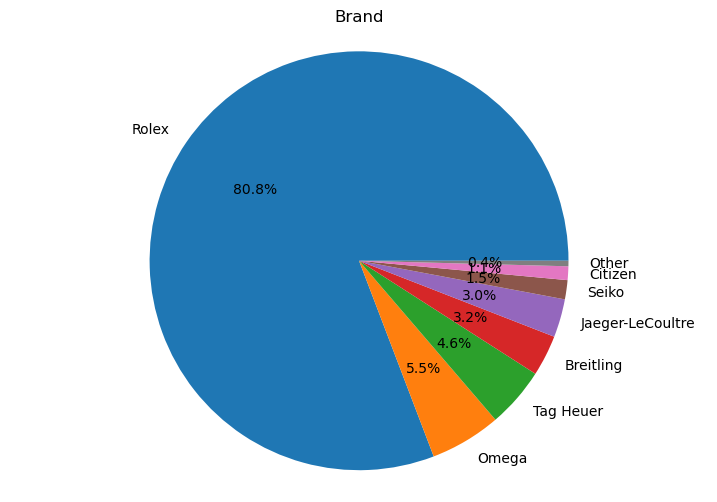

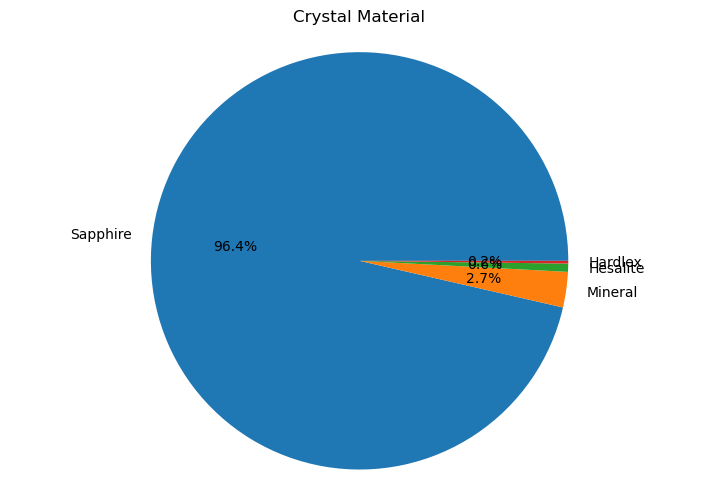

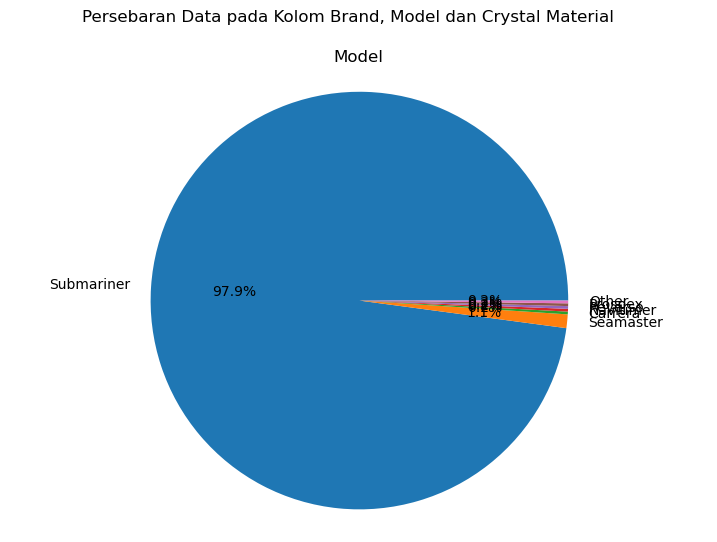

In [159]:
import matplotlib.pyplot as plt

def pie_bool(data):
    Brand_label = ['Rolex', 'Omega', 'Tag Heuer', 'Breitling', 'Jaeger-LeCoultre', 'Seiko', 'Citizen', 'Other']
    Crystal_label = ['Sapphire', 'Mineral', 'Hesalite', 'Hardlex']
    Model_label = ['Submariner', 'Seamaster', 'Carrera', 'Navitimer', 'Reverso', 'Prospex', 'Other']

    plt.figure(figsize=(9, 6))  # Adjust the size of the figure here
    values = data['Brand'].value_counts().values
    Brand_label = Brand_label[:len(values)]  # Truncate Brand_label to match the length of values
    plt.pie(values, labels=Brand_label, autopct='%1.1f%%')
    plt.title('Brand')
    plt.axis('equal')

    plt.figure(figsize=(9, 6))  # Adjust the size of the figure here
    values = data['Crystal Material'].value_counts().values
    plt.pie(values, labels=Crystal_label, autopct='%1.1f%%')
    plt.title('Crystal Material')
    plt.axis('equal')
    
    plt.figure(figsize=(9, 6))  # Adjust the size of the figure here
    values = data['Model'].value_counts().values
    Model_label = Model_label[:len(values)]  # Truncate Model_label to match the length of values
    plt.pie(values, labels=Model_label, autopct='%1.1f%%')
    plt.title('Model')
    plt.axis('equal')

    plt.suptitle('Persebaran Data pada Kolom Brand, Model dan Crystal Material')
    plt.show()

# Call the pie_bool function using your data
pie_bool(data)

<AxesSubplot:xlabel='Power Reserve', ylabel='Count'>

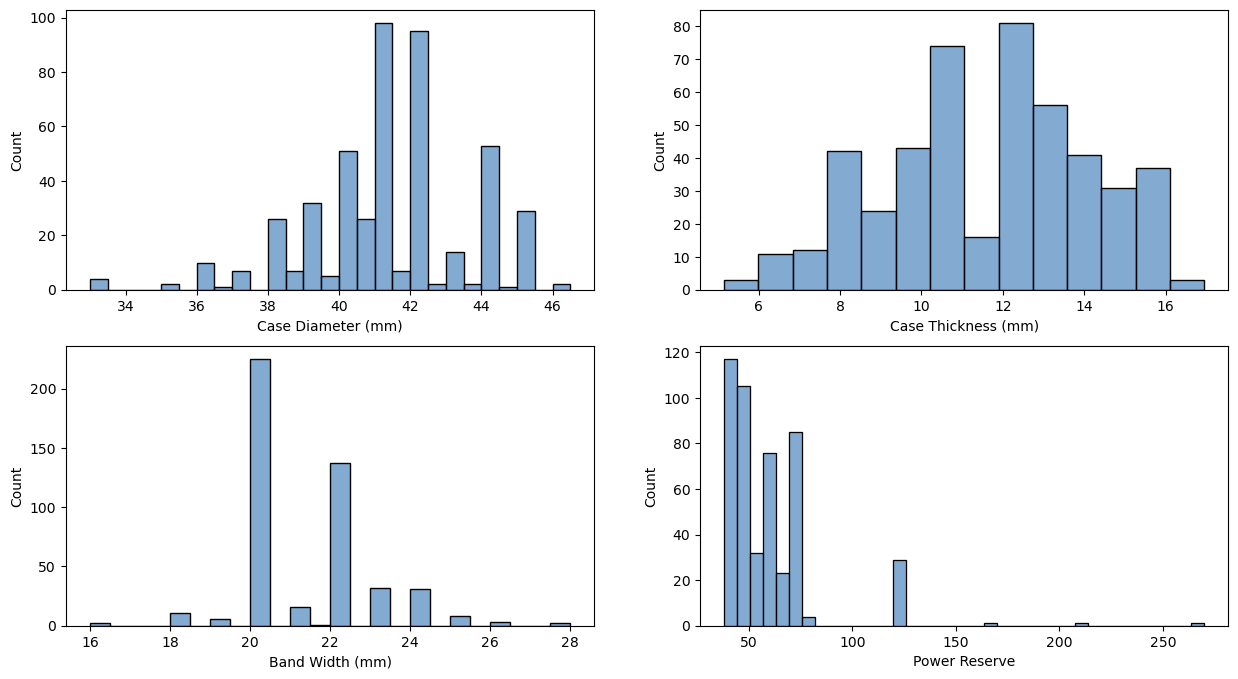

In [107]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data, x='Case Diameter (mm)', ax=axes[0,0], color='#598fc4')
sns.histplot(data=data, x='Case Thickness (mm)', ax=axes[0,1], color='#598fc4')
sns.histplot(data=data, x='Band Width (mm)', ax=axes[1,0], color='#598fc4')
sns.histplot(data=data, x='Power Reserve', ax=axes[1,1], color='#598fc4')

## **Data Preparation**
* Melakukan seleksi fitur yaitu membagi data fitur dan data label
* Membagi dataset menjadi data training dan data testing

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

**Membagi dataset menjadi data latih dan data uji dengan prosentasi 85 : 15**

In [109]:
#Split Train and Test Set
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Brand,Model,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Power Reserve
0,Rolex,Submariner,300,40.00,13.00,20.00,Black,Sapphire,48
1,Omega,Seamaster,600,43.50,14.47,21.00,Blue,Sapphire,60
2,Tag Heuer,Carrera,100,41.00,13.00,20.00,White,Sapphire,42
3,Breitling,Navitimer,30,43.00,14.25,22.00,Black,Sapphire,70
5,Jaeger-LeCoultre,Reverso,30,42.90,9.20,20.00,Black,Sapphire,45


In [110]:
X_train.shape, X_test.shape

((402, 9), (72, 9))

## **Membangun Model**

* Memprediksi algoritma dengan performa terbaik menggunakan LazyPredict
* Membuat pipeline untuk memudahkan proses preprocessing model
*	Menggunakan ColumnTransformer untuk menggabungkan pipeline data numerik dan data kategorik
* Memilih 3 (tiga) algoritma dengan performa terbaik untuk di evaluasi
* Menambahkan parameter tunning pada 3 algoritma yang dipilih

In [163]:
!pip install lazypredict

In [111]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:05<00:00,  7.42it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.78,0.81,0.34,0.31
ExtraTreeRegressor,0.78,0.81,0.34,0.04
GradientBoostingRegressor,0.76,0.79,0.36,0.13
BaggingRegressor,0.75,0.78,0.36,0.07
XGBRegressor,0.73,0.77,0.37,0.14
HistGradientBoostingRegressor,0.73,0.76,0.38,0.38
ExtraTreesRegressor,0.72,0.76,0.38,0.24
LGBMRegressor,0.70,0.73,0.40,0.08
AdaBoostRegressor,0.58,0.63,0.47,0.19


**Menambahkan library dari 3 algoritma teratas**

In [114]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Memilih Hyperparameter dari 3 Algoritma Teratas

**Menghapus kolom yang merupakan data kategorikal**

In [116]:
X = data.drop(columns=['Brand', 'Model', 'Dial Color', 'Crystal Material','Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Power Reserve
0,300,40.00,13.00,20.00,48
1,600,43.50,14.47,21.00,60
2,100,41.00,13.00,20.00,42
3,30,43.00,14.25,22.00,70
5,30,42.90,9.20,20.00,45


**Mencari Hyperparameter Algoritma RandomForestRegressor**

In [117]:
RF = RandomForestRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_samples': [0.2 , 0.3, 0.4, 0.5, 0.6],
    'max_features' : [0.4, 0.5, 0.6, 0.7, 0.8]
}

rf_search = GridSearchCV(RF, parameters)

rf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.4, 0.5, 0.6, 0.7, 0.8],
                         'max_samples': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [70, 80, 90, 100, 200]})

In [118]:
print(rf_search.best_params_)

{'max_features': 0.4, 'max_samples': 0.6, 'n_estimators': 90}


**Mencari Hyperparameter Algoritma ExtraTreeRegressor**

In [122]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

ET = ExtraTreesRegressor()

parameters = {
    'n_estimators': [10, 50, 100],
    'criterion': ['mse', 'mae'],
    'max_depth': [2, 8, 16, 32, 50],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],    
    'warm_start': [True, False],
}

et_search = GridSearchCV(ET, parameters)
et_search.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 8, 16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100],
                         'warm_start': [True, False]})

In [144]:
print(et_search.best_params_)

{'criterion': 'mse', 'max_depth': 32, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'warm_start': True}


**Mencari Hyperparameter Algoritma GradientBoostingRegressor**

In [124]:
GB = GradientBoostingRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_features': [2, 3, 4, 5],
    'min_samples_split' : [10, 20, 30, 40],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf' : [3, 4, 5, 6]
}

gb_search = GridSearchCV(GB, parameters)

gb_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [70, 80, 90, 100, 200]})

In [125]:
print(gb_search.best_params_)

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


**Mengembalikan kolom kategorikal sebagai data fitur untuk pelatihan**

In [126]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Brand,Model,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Power Reserve
0,Rolex,Submariner,300,40.00,13.00,20.00,Black,Sapphire,48
1,Omega,Seamaster,600,43.50,14.47,21.00,Blue,Sapphire,60
2,Tag Heuer,Carrera,100,41.00,13.00,20.00,White,Sapphire,42
3,Breitling,Navitimer,30,43.00,14.25,22.00,Black,Sapphire,70
5,Jaeger-LeCoultre,Reverso,30,42.90,9.20,20.00,Black,Sapphire,45


In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 506
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                474 non-null    object 
 1   Model                474 non-null    object 
 2   Water Resistance     474 non-null    int32  
 3   Case Diameter (mm)   474 non-null    float64
 4   Case Thickness (mm)  474 non-null    float64
 5   Band Width (mm)      474 non-null    float64
 6   Dial Color           474 non-null    object 
 7   Crystal Material     474 non-null    object 
 8   Power Reserve        474 non-null    int32  
dtypes: float64(3), int32(2), object(4)
memory usage: 49.5+ KB


**Melihat index tiap kolom**

In [128]:
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Brand',
 1: 'Model',
 2: 'Water Resistance',
 3: 'Case Diameter (mm)',
 4: 'Case Thickness (mm)',
 5: 'Band Width (mm)',
 6: 'Dial Color',
 7: 'Crystal Material',
 8: 'Power Reserve'}

**Menambahkan ColumnTransformer untuk menggabungkan data numerik dan kategorik**

In [140]:
feature = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 8])
])

**Menggunakan Pipeline dan Hyperparameter**

In [142]:
GB = GradientBoostingRegressor(max_depth= 4, max_features= 3, min_samples_leaf= 5, 
                               min_samples_split= 10, n_estimators= 200)

GB_pipe = Pipeline([
    ('feature', feature),
    ('GB', GB)
])

GB_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature',
                 ColumnTransformer(transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 8])])),
                ('GB',
                 GradientBoostingRegressor(max_depth=4, max_features=3,
                                           min_samples_leaf=5,
                                           min_samples_split=10,
                                           n_estimators=200))])

In [143]:
RF = RandomForestRegressor(max_features= 0.4, max_samples= 0.6, n_estimators= 90)

RF_pipe = Pipeline([
    ('feature', feature),
    ('RF', RF)
])

RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature',
                 ColumnTransformer(transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 8])])),
                ('RF',
                 RandomForestRegressor(max_features=0.4, max_samples=0.6,
                                       n_estimators=90))])

In [145]:
ET = ExtraTreesRegressor(criterion= 'mse', max_depth= 32, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, 
                         n_estimators= 10, warm_start= True)

ET_pipe = Pipeline([
    ('feature', feature),
    ('ET', ET)
])

ET_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature',
                 ColumnTransformer(transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 8])])),
                ('ET',
                 ExtraTreesRegressor(criterion='mse', max_depth=32,
                                     n_estimators=10, warm_start=True))])

## **Evaluation**
*	Metrik evaluasi yang digunakan adalah *Mean Square Error* (MSE), *Root Mean Square Error* (RMSE), dan *R2 Score*
* MSE melakukan pengurangan nilai data aktual dengan data peramalan dan hasilnya dikuadratkan (squared) kemudian dijumlahkan secara keseluruhan dan membaginya dengan banyaknya data yang ada
* RMSE adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. Cara menghitungnya tinggal mengakar kan mse menggunakan fungsi *np.sqrt*
* R2 Score dijadikan sebagai pengukuran seberapa baik garis regresi mendekati nilai data asli yang dibuat melalui model.
* Menampilkan hasil pengujian MSE, RMSE, dan R2 Score dari 3 algoritma teratas

### **Evaluasi Model dengan Performa Terbaik**

In [148]:
final_report = {'Model_Name': [], 'mse': [], 'r2': []}

# Evaluasi model RandomForestRegressor
pred = RF_pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('RandomForestRegressor')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

# Evaluasi model ExtraTreesRegressor
pred = ET_pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('ExtraTreesRegressor')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

# Evaluasi model GradientBoostingRegressor
pred = _pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('GradientBoostingRegressor')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

In [149]:
final_report

{'Model_Name': ['RandomForestRegressor',
  'ExtraTreesRegressor',
  'GradientBoostingRegressor'],
 'mse': [0.1288362719786853, 0.1263014308647928, 0.23136746558516577],
 'r2': [0.7828587958330299, 0.787131027894616, 0.6100522833310906]}

**Menyederhanakan format data numerik**

In [150]:
pd.options.display.float_format = '{:.7f}'.format

In [151]:
final_report = pd.DataFrame.from_dict(final_report)
final_report

,Model_Name,mse,r2
0,RandomForestRegressor,0.1288363,0.7828588
1,ExtraTreesRegressor,0.1263014,0.7871310
2,GradientBoostingRegressor,0.2313675,0.6100523


**Menambah Metrik RMSE untuk Pengujian**

In [152]:
final_report['rmse'] = np.sqrt(final_report['mse'])
final_report

,Model_Name,mse,r2,rmse
0,RandomForestRegressor,0.1288363,0.7828588,0.3589377
1,ExtraTreesRegressor,0.1263014,0.7871310,0.3553891
2,GradientBoostingRegressor,0.2313675,0.6100523,0.4810067


### **Membandingkan data sebenarnya dengan hasil prediksi**

In [155]:
model_dict = {'RF': RF_pipe, 'ET': ET_pipe, 'GB': GB_pipe}
prediksi = X_test.iloc[:130].copy()
pred_dict = {'y_true':y_test[:130]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_ET,prediksi_GB
79,12.5793451,12.4000000,12.4000000,12.3000000
101,10.9594359,11.5000000,11.5000000,11.5000000
271,11.5038999,11.5000000,11.5000000,11.5000000
225,11.6393378,12.0000000,12.0000000,12.0000000
466,13.2079537,13.1000000,13.1000000,13.0000000
...,...,...,...,...
240,12.6924877,12.4000000,12.4000000,12.3000000
429,12.6301174,12.4000000,12.4000000,12.3000000
169,11.6912976,12.4000000,12.4000000,12.3000000
381,12.5948493,12.3000000,12.3000000,12.2000000
